# MINI PROJECT: STUDENTS DROPOUT
#### GROUP MEMBERS: NASRIN AMANI BINTI FAIZAL, DAMIA ATHIRAH BINTI DZULAKMAR
#### CLASS: 2TSC
#### MATRIC. NO: 2230211, 2230192

## Step 1: Problem Definition (Business Understanding)

- **Business Objective**: To build classification models that predict whether a student will `drop out` or successfully `graduate` based on their demographic, enrollment and early academic performance data. This allows the university to identify at-risk students before they reach advanced stages of study and provide targeted interventions to improve success rates.  

- **Business Value**: University can take proactive measures by detecting students at risk of dropping out early, implement targeted interventions such as tutoring, financial support or counseling. This improves student retention, increases graduation rates, enhances institutional reputation and ensures resources are allocated more effectively.

- **Guiding Questions**:  
  - Which student characteristics and academic performance indicators are most associated with dropout or success?
  - What combination of demographic, enrollment, and early performance factors best predicts student outcomes?
  - Can the university identify high-risk students early enough for meaningful intervention?
  - Which machine learning classification models provide the most accurate and reliable predictions?

- **Approach**: We will frame this as a binary classification task (dropout vs success). Using Python, the data will undergo preprocessing, followed by training and evaluation of machine learning models. The results will be analyzed to highlight important predictors and provide actionable insights that support decision-making in higher education.


In [ ]:
import numpy as np #lib for numerical operations
import pandas as pd #lib for data manipulation

# library for graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for normalization
from sklearn.preprocessing import MinMaxScaler #minmax
from sklearn.preprocessing import StandardScaler #zscore

from sklearn.preprocessing import LabelEncoder #for encoding

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Understanding
Students Dropout Dataset Metadata Table

![Table 1](table1.png)

![Table 2](table2.png)

![Table 3](table3.png)

![Table 4](table4.png)

![Table 5](table5.png)

![Table 6](table6.png)

![Table 7](table7.png)

In [ ]:
df_original = pd.read_csv("student_data.csv")
df = df_original.copy()
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,1,4,9238,1,1,127.0,1,1,38,...,0,6,7,6,13.428571,0,11.1,0.6,2.02,Graduate
1,1,1,1,8014,0,1,100.0,1,38,19,...,0,6,6,6,12.500000,0,12.7,3.7,-1.70,Graduate
2,1,1,1,9853,1,1,133.0,1,1,38,...,4,8,8,8,12.625000,0,15.5,2.8,-4.06,Enrolled
3,1,1,2,9070,1,1,134.0,1,1,19,...,0,6,11,4,11.333333,0,13.9,-0.3,0.79,Dropout
4,1,18,2,9853,1,1,123.0,1,1,3,...,0,6,8,4,10.750000,0,10.8,1.4,1.74,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,1,17,3,9119,1,1,131.0,1,37,37,...,0,5,10,2,11.500000,4,7.6,2.6,0.32,Dropout
5703,1,1,2,9773,1,1,135.0,1,3,1,...,0,6,13,5,12.400000,0,8.9,1.4,3.51,Enrolled
5704,1,17,2,9238,1,1,125.0,1,19,19,...,0,6,9,4,11.250000,0,8.9,1.4,3.51,Graduate
5705,1,39,1,9085,1,1,130.0,1,4,1,...,0,6,7,5,14.500000,0,11.1,0.6,2.02,Enrolled


In [ ]:
print("Descriptive statistics for the attributes:")
df.describe()

Descriptive statistics for the attributes:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,...,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,1.183284,18.892413,1.709480,8805.552479,0.886630,4.689154,132.921938,1.778868,19.738742,22.240407,...,0.143333,0.522341,6.198353,7.995094,4.384615,10.138811,0.152444,11.502120,1.244840,0.011395
std,0.620410,17.555560,1.305192,2152.011573,0.317072,10.412358,13.169367,6.404095,15.484247,15.284521,...,0.681840,1.882730,2.208842,3.908385,3.015522,5.241157,0.742691,2.638458,1.397045,2.246769
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,96.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.714286,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.306250,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,108.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


- 25% is the **Lower quartile (Q1)**
- 50% is the **median**
- 75% is the **Upper quartile (Q3)**

In [ ]:
df['Age_at_enrollment'].describe()

,Age_at_enrollment
count,5707.000000
mean,23.352900
std,7.769092
min,17.000000
25%,19.000000
50%,20.000000
75%,25.000000
max,70.000000


In [ ]:
# Display number of rows and columns
df.shape

(5707, 37)

The dataset consists of 5707 rows and 37 columns.

In [ ]:
# display further details of the data type for each variable in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                5707 non-null   int64  
 1   Application_mode                              5707 non-null   int64  
 2   Application_order                             5707 non-null   int64  
 3   Course                                        5707 non-null   int64  
 4   Daytime_evening_attendance                    5707 non-null   int64  
 5   Previous_qualification                        5707 non-null   int64  
 6   Previous_qualification_grade                  5707 non-null   float64
 7   Nacionality                                   5707 non-null   int64  
 8   Mothers_qualification                         5707 non-null   int64  
 9   Fathers_qualification                         5707 non-null   i

The dataset contains no null values across all rows and columns.

Data types:
- Most columns are of type **integer**.
- Seven columns are of type **float64**:
  - Previous_qualification_grade
  - Admission_grade
  - Curricular_units_1st_sem_grade
  - Curricular_units_2nd_sem_grade
  - Unemployment_rate
  - Inflation_rate
  - GDP

- The target variable is **Target**, which is of type **object**.

In [ ]:
# Checking the missing values
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


All columns have zero missing values, indicating the dataset is complete and does not require imputation. However, redundant/irrelevant columns will be removed to refine the dataset for prediction.

In [ ]:
df['Displaced'].value_counts(normalize=True)

,proportion
Displaced,
1,0.554757
0,0.445243


In [ ]:
df['Educational_special_needs'].value_counts(normalize=True)

,proportion
Educational_special_needs,
0,0.99194
1,0.00806


In [ ]:
#Display full columns
pd_options = pd.get_option("display.max_columns"), pd.get_option("display.width")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

#Filter rows 1st semester enrolled = 0
rows_sem1_enrolled_zero = df[df['Curricular_units_1st_sem_enrolled'] == 0]
display(rows_sem1_enrolled_zero)

#reset options back to default
pd.set_option("display.max_columns", pd_options[0])
pd.set_option("display.width", pd_options[1])

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
40,1,44,1,171,1,39,150.0,1,19,1,9,9,154.8,1,0,0,1,1,0,21,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,12.4,0.5,1.79,Graduate
48,1,1,1,171,1,1,130.0,1,29,38,9,8,122.0,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,7.6,2.6,0.32,Graduate
73,1,1,2,171,1,1,127.0,1,3,39,1,3,133.5,1,0,0,1,1,0,17,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,15.5,2.8,-4.06,Enrolled
111,1,44,1,171,1,39,150.0,1,19,1,9,9,154.8,1,0,0,1,1,0,21,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,12.4,0.5,1.79,Graduate
197,1,1,2,171,1,1,165.0,1,3,3,2,2,163.6,1,0,0,1,0,0,18,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,12.4,0.5,1.79,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,1,1,5,171,1,1,139.0,1,19,3,9,2,136.9,1,0,0,1,1,1,19,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,9.4,-0.8,-3.12,Graduate
5624,1,1,1,171,1,1,115.0,1,37,37,9,8,129.0,1,0,1,0,0,1,23,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,9.4,-0.8,-3.12,Dropout
5633,1,44,1,171,1,39,140.0,1,1,1,9,9,140.0,0,0,0,1,1,0,21,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,15.5,2.8,-4.06,Enrolled
5690,1,17,1,171,1,1,136.0,1,38,38,7,7,127.3,1,0,0,1,0,0,19,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,15.5,2.8,-4.06,Dropout


- Their final status 'Target' is mixed, either Enrolled, Graduate, Dropout
- This means 0 doesnt always mean dropout, it could reflect credit transfer, late entry or other valid cases
- All students from **Course 171** (Animation and Multimedia Design) have every Curricular_units column = 0.  
- Their final outcome (`Target`) still varies
- Suggests that course code 171 may record academic data differently, possibly due to program structure or missing curriculum mapping

In [ ]:
sem1_cols = [
    "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations"
]

sem2_cols = [
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations"
]

# Check inconsistencies for sem 1
sem1_inconsistent = df[
    (df["Curricular_units_1st_sem_enrolled"] == 0) &
    (df[sem1_cols].sum(axis=1) != 0)  # some other column not 0
]

# Check inconsistencies for sem 2
sem2_inconsistent = df[
    (df["Curricular_units_2nd_sem_enrolled"] == 0) &
    (df[sem2_cols].sum(axis=1) != 0)
]

print("Semester 1 inconsistent rows:", len(sem1_inconsistent))
print("Semester 2 inconsistent rows:", len(sem2_inconsistent))

#showsample rows if any inconsistencies
if not sem1_inconsistent.empty:
    display(sem1_inconsistent.head())
if not sem2_inconsistent.empty:
    display(sem2_inconsistent.head())


Semester 1 inconsistent rows: 0
Semester 2 inconsistent rows: 0


- We tested whether any rows had `Curricular_units_1st_sem_enrolled or Curricular_units_2nd_sem_enrolled = 0` but non-zero values in other related curricular columns (credited, evaluations, approved, grades, without evaluations).  
- This confirms the dataset is internally consistent: whenever enrolled is `0`, all other related semester variables are also 0.  
- Therefore, the 0 values appear systematic and logical, most likely representing students with no recorded activity in that semester like transfer credits or delayed enrollment, rather than being data entry errors.

In [ ]:
course_171_modes = df[df["Course"] == 171]["Application_mode"].unique()
print("Unique Application_mode for Course 171:", course_171_modes)

Unique Application_mode for Course 171: [16 44  1 43 17 39 42 18  7 53]


**Application mode code:**

- 1  - 1st phase general contingent  
- 16 - 1st phase special contingent (Madeira Island)
- 17 - 2nd phase general contingent
- 18 - 3rd phase general contingent

it could be that the dataset only captured students who either dropped early, switched paths or transferred credits, so their curricular records appear as 0.


---


- 7  - Holders of other higher courses  
- 39 - Over 23 years old

These suggest non-traditional entry routes, where students might bypass the standard 1st/2nd semester curriculum


---


- 42 - Transfer  
- 43 - Change of course  
- 44 - Technological specialization diploma holders   
- 53 - Short cycle diploma holders

These imply that the students already had prior credits from other institutions or programs. In such cases, the system might not record any 1st or 2nd semester curricular enrollments, since they entered later or with exemptions.

**Handling Missing Values**

The dataset contains **no missing values**  
- All columns are complete with valid entries.  
- Zeros in curricular unit columns like enrolled, approved, grade are **valid values**, not placeholders
  - enrolled = 0 indicates the student did not take any courses in that semester.  
  - grade = 0 is a valid grade in the Portuguese 0–20 system, representing failure or no credit.  
- Course 171 (Animation and Multimedia Design) students consistently have zero values for curricular units, which aligns with their special application modes

Therefore, **no imputation using mean, median or mode was required**, as the dataset is already clean and internally consistent.

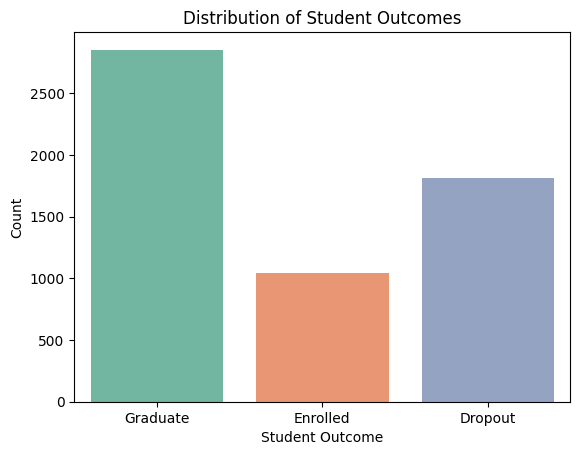

In [ ]:
# Countplot of student outcomes
sns.countplot(x='Target', data=df, palette='Set2')
plt.title("Distribution of Student Outcomes")
plt.xlabel("Student Outcome")
plt.ylabel("Count")
plt.show()

In [ ]:
outcome_counts = df['Target'].value_counts() # Count of each outcome

# Percentage of each outcome
outcome_percent = df['Target'].value_counts(normalize=True) * 100

# Combine one table
outcome_summary = pd.DataFrame({
    'Count': outcome_counts,
    'Percentage': outcome_percent.round(2)
})

print(outcome_summary)

          Count  Percentage
Target                     
Graduate   2851       49.96
Dropout    1815       31.80
Enrolled   1041       18.24


The chart highlights imbalance among the classes. Graduate forms the majority class, followed by dropout and enrolled.

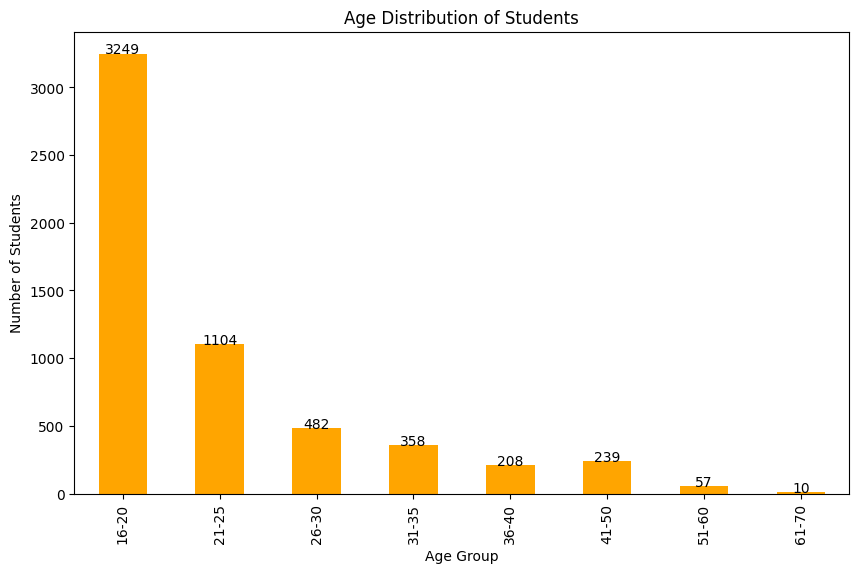

In [ ]:
# Define custom age bins and labels
bins = [16, 21, 26, 31, 36, 41, 51, 61, 71]  # upper limit is exclusive
labels = ["16-20", "21-25", "26-30", "31-35", "36-40", "41-50", "51-60", "61-70"]

# Count number of students in each age group temporarily
age_distribution = pd.cut(df['Age_at_enrollment'], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar', color='orange')

plt.title("Age Distribution of Students")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")

# Add count labels on top of bars
for i, count in enumerate(age_distribution):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.show()

In [ ]:
# Bins covering 17–70
age_bins = [15, 20, 25, 30, 35, 40, 50, 60, 70]
age_labels = ["16-20", "21-25", "26-30", "31-35", "36-40", "41-50", "51-60", "61-70"]

# Categorize students into bins temporarily (not added to df)
age_groups = pd.cut(df['Age_at_enrollment'], bins=age_bins, labels=age_labels, right=True)

# Count & percentage
age_counts = age_groups.value_counts().sort_index()
age_percentages = (age_counts / len(df)) * 100

# Combine into a table
age_distribution = pd.DataFrame({
    'Count': age_counts,
    'Percentage': age_percentages.round(2)
})

print(age_distribution)

                   Count  Percentage
Age_at_enrollment                   
16-20               3249       56.93
21-25               1104       19.34
26-30                482        8.45
31-35                358        6.27
36-40                208        3.64
41-50                239        4.19
51-60                 57        1.00
61-70                 10        0.18


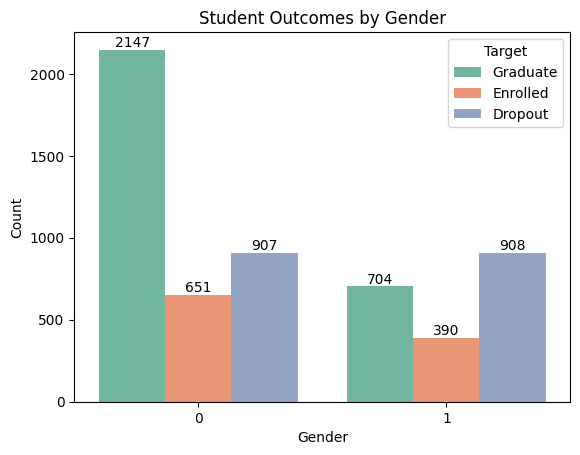

In [ ]:
#Check if outcomes differ between genders
ax = sns.countplot(x='Gender', hue='Target', data=df, palette='Set2')
plt.title("Student Outcomes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add count labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

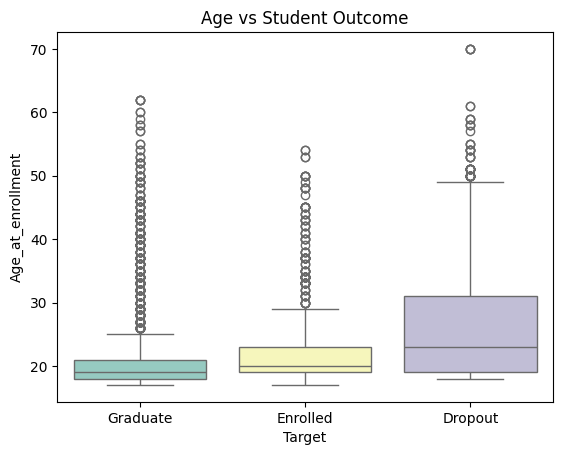

In [ ]:
sns.boxplot(x='Target', y='Age_at_enrollment', data=df, palette='Set3')
plt.title("Age vs Student Outcome")
plt.show()

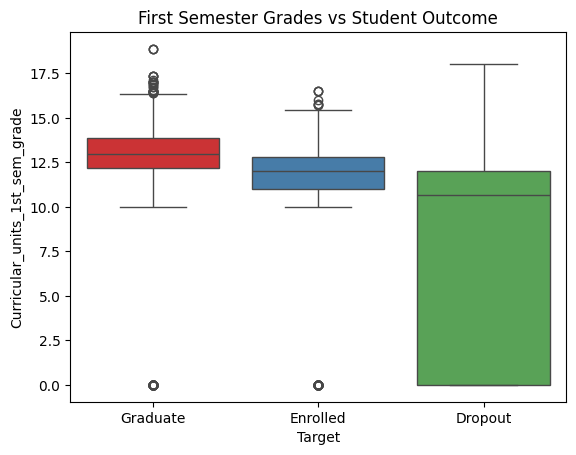

In [ ]:
sns.boxplot(x='Target', y='Curricular_units_1st_sem_grade', data=df, palette='Set1')
plt.title("First Semester Grades vs Student Outcome")
plt.show()

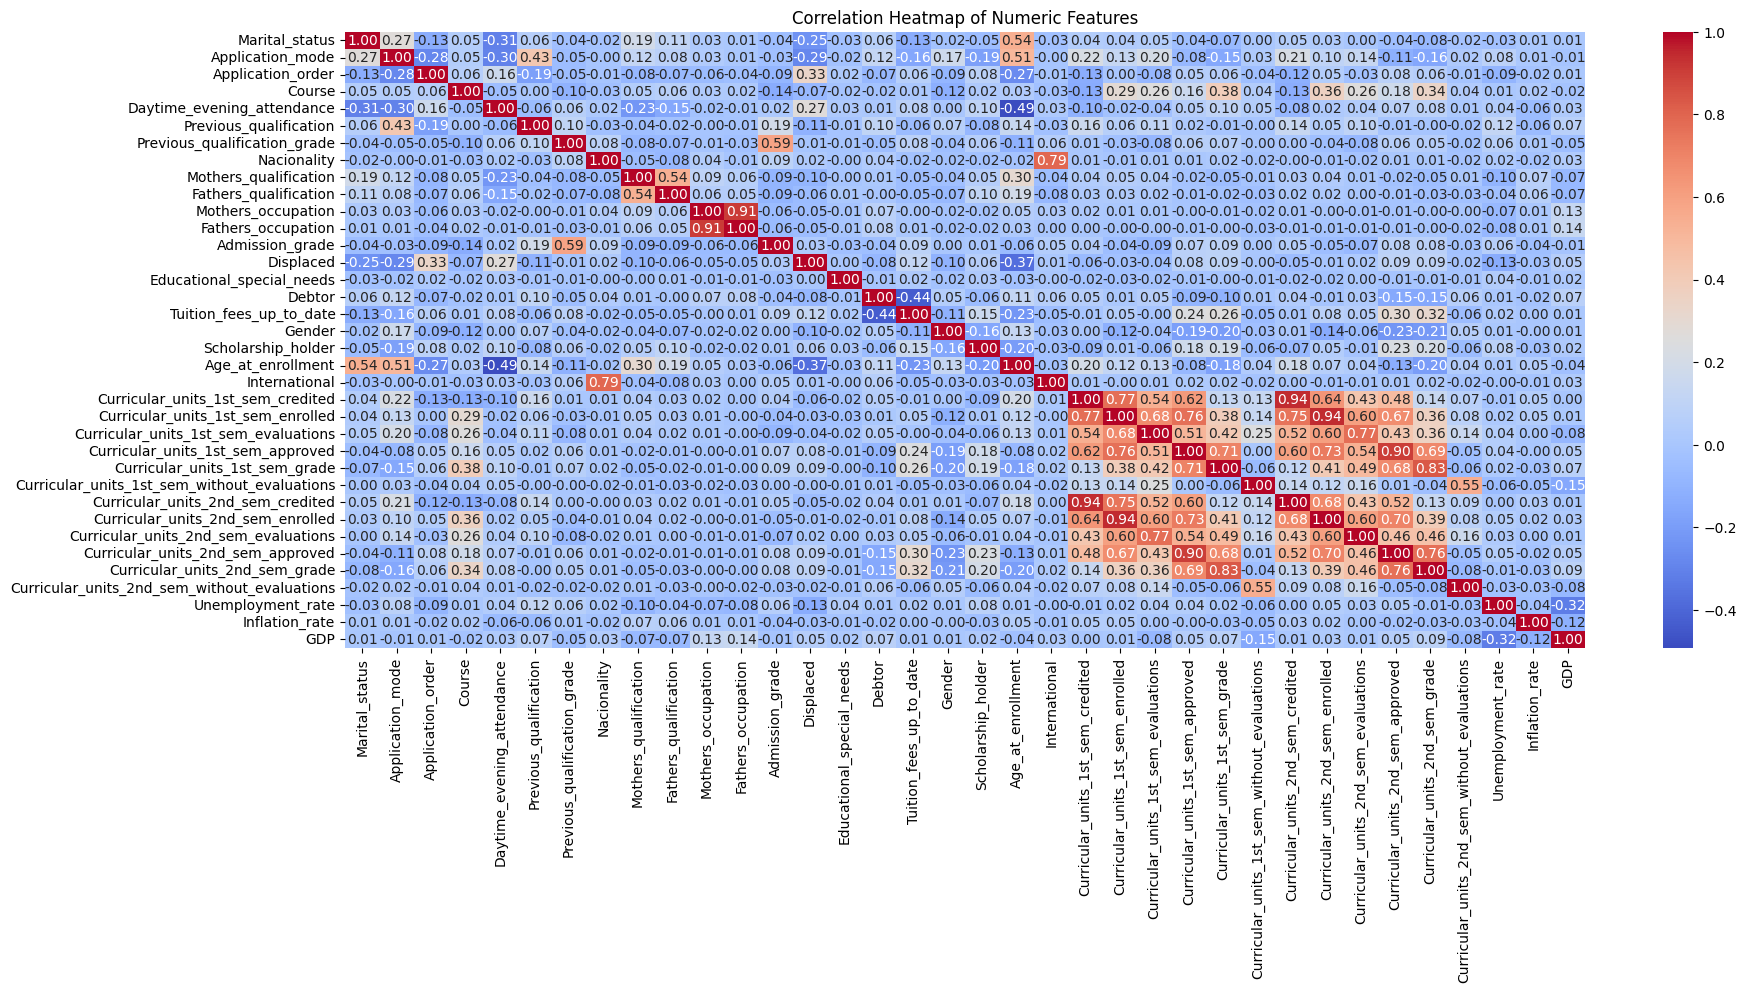

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Step 3: Data Preparation and Preprocessing
- We observed that the dataset has no missing values, but some features contain 0 that may require careful interpretation (e.g., grades or number of units).
- We removed irrelevant or redundant columns that do not contribute meaningfully to predicting student outcomes.  
- We encoded categorical variables such as `Target` (Dropout, Enrolled, Graduate).

In [ ]:
# Drop irrelevant columns
cols_to_drop = ['Application_order', 'Daytime_evening_attendance', 'Nacionality', 'Educational_special_needs', 'Unemployment_rate', 'Inflation_rate', 'GDP']
df = df.drop(columns=cols_to_drop)

# Check remaining columns and how many
print(f"Remaining columns ({len(df.columns)}): {df.columns.tolist()}")

Remaining columns (30): ['Marital_status', 'Application_mode', 'Course', 'Previous_qualification', 'Previous_qualification_grade', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Target']


- Daytime_evening_attendance: The distribution is highly imbalanced (almost all is 1 - daytime)
- Nacionality: Almost all students share the same nationality, so it has little to no variance and does not contribute to prediction.
- Unemployment_rate, Inflation_rate, GDP are macroeconomic indicators. They apply to all students in the same year, meaning they do not capture individual differences in academic success or dropout risk.
- Including them could add noise without improving model performance.

In [ ]:
# Remove rows with 'Enrolled' outcome
df = df[df['Target'] != 'Enrolled'].reset_index(drop=True)

# Check distribution after removal
print(df['Target'].value_counts())

Target
Graduate    2851
Dropout     1815
Name: count, dtype: int64


Enrolled cases do not really tell us whether the student will succeed or fail in the end, they are basically uncertain labels. Keeping them may confuse the model so we decide to remove them.

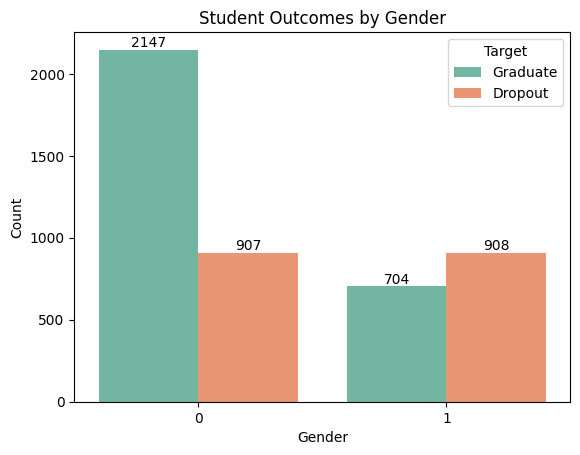

In [ ]:
#Check if outcomes differ between genders
ax = sns.countplot(x='Gender', hue='Target', data=df, palette='Set2')
plt.title("Student Outcomes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Display before and after without adding new column
temp = pd.DataFrame({
    "Target_before": df["Target"],
    "Target_after": le.fit_transform(df["Target"])
})

display(temp.head(10))

# Apply encoding to main dataframe
df["Target"] = le.transform(df["Target"])

# Show mapping
print("Encoding mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

,Target_before,Target_after
0,Graduate,1
1,Graduate,1
2,Dropout,0
3,Dropout,0
4,Dropout,0
5,Dropout,0
6,Graduate,1
7,Graduate,1
8,Dropout,0
9,Graduate,1


Encoding mapping: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}


In [ ]:
#check how many rows will be affected
print("Rows with Age_at_enrollment >= 51:", df[df['Age_at_enrollment'] >= 51].shape[0])

df = df[df['Age_at_enrollment'] < 51] #drop rows

df = df.reset_index(drop=True) #reset index

print("Remaining rows:", df.shape[0])
print(df['Age_at_enrollment'].describe())

Rows with Age_at_enrollment >= 51: 63
Remaining rows: 4603
count    4603.000000
mean       23.128177
std         7.114210
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        50.000000
Name: Age_at_enrollment, dtype: float64


                                   Q1         Q3       IQR Lower_Bound  \
Previous_qualification_grade    125.0      140.0      15.0       102.5   
Admission_grade                 118.4      136.0      17.6        92.0   
Age_at_enrollment                19.0       25.0       6.0        10.0   
Curricular_units_1st_sem_grade   11.0  13.428571  2.428571    7.357143   
Curricular_units_2nd_sem_grade   10.5   13.41625   2.91625    6.125625   

                               Upper_Bound Outlier_Count  \
Previous_qualification_grade         162.5           186   
Admission_grade                      162.4            72   
Age_at_enrollment                     34.0           446   
Curricular_units_1st_sem_grade   17.071429           859   
Curricular_units_2nd_sem_grade   17.790625          1047   

                                                                   Outlier_Values  
Previous_qualification_grade    [100.0, 177.0, 180.0, 100.0, 164.0, 177.0, 167...  
Admission_grade           

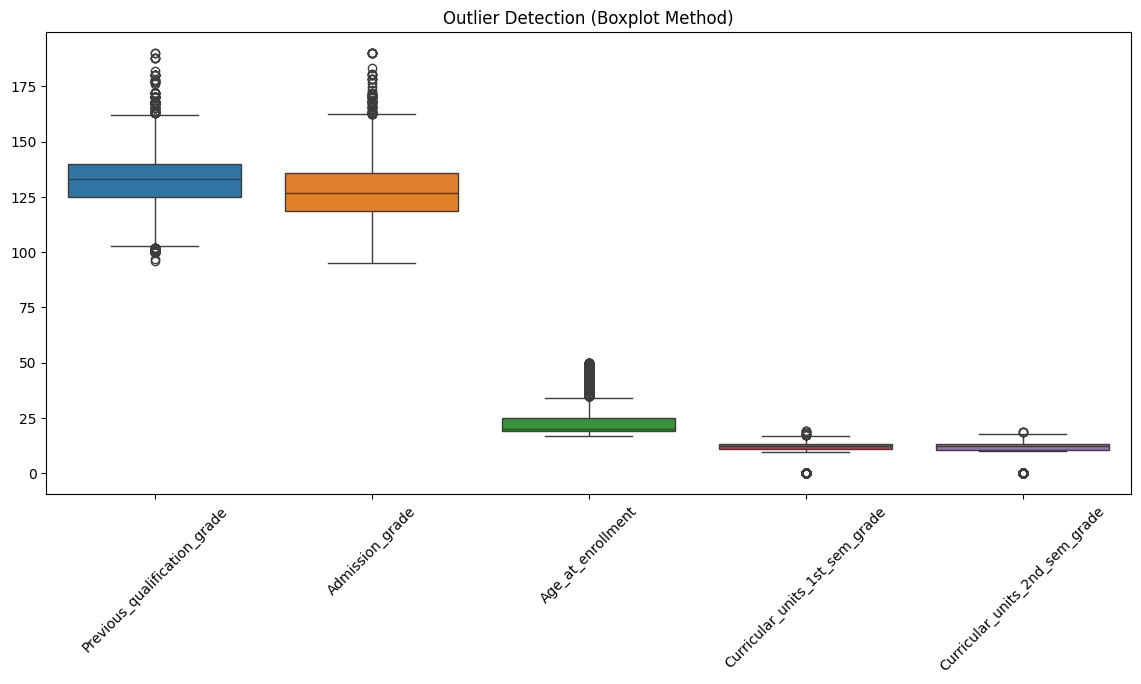

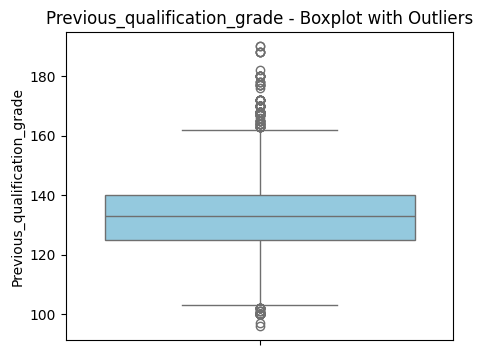

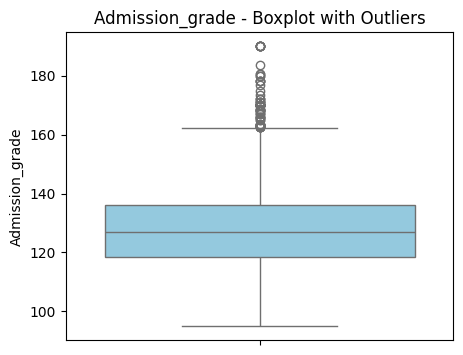

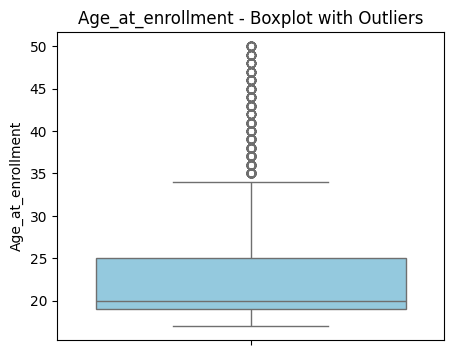

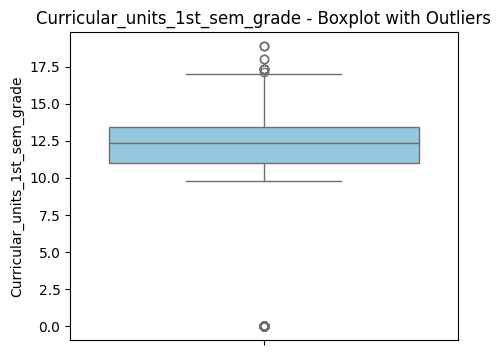

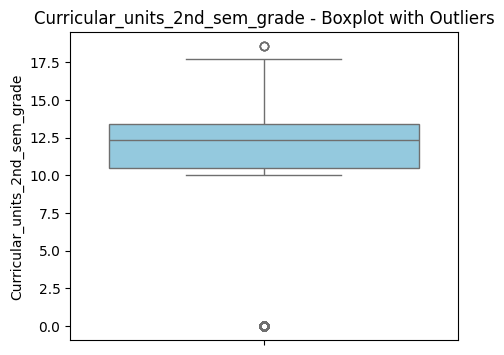

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(df, cols):
    outlier_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        outlier_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower_Bound": lower_bound,
            "Upper_Bound": upper_bound,
            "Outlier_Count": outliers.count(),
            "Outlier_Values": outliers.values[:10]  # preview first 10
        }

    return pd.DataFrame(outlier_info).T

# Define the list of continuous columns to check for outliers
continuous_cols = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade'
]

# --- Apply detection ---
outlier_report = detect_outliers(df, continuous_cols)
print(outlier_report)

# --- Visualization: Boxplots for continuous features ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[continuous_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection (Boxplot Method)")
plt.show()

for col in continuous_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"{col} - Boxplot with Outliers")
    plt.show()

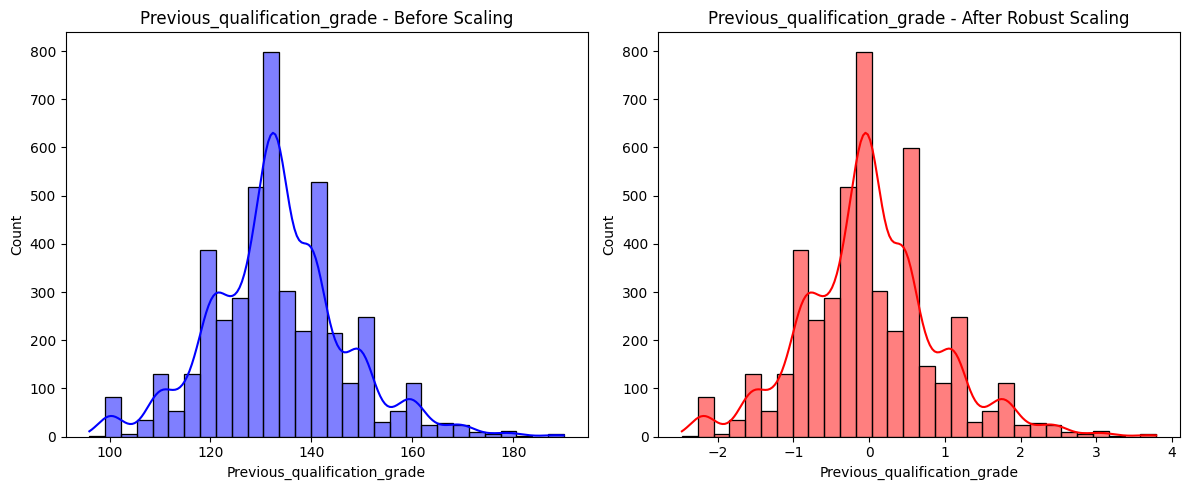

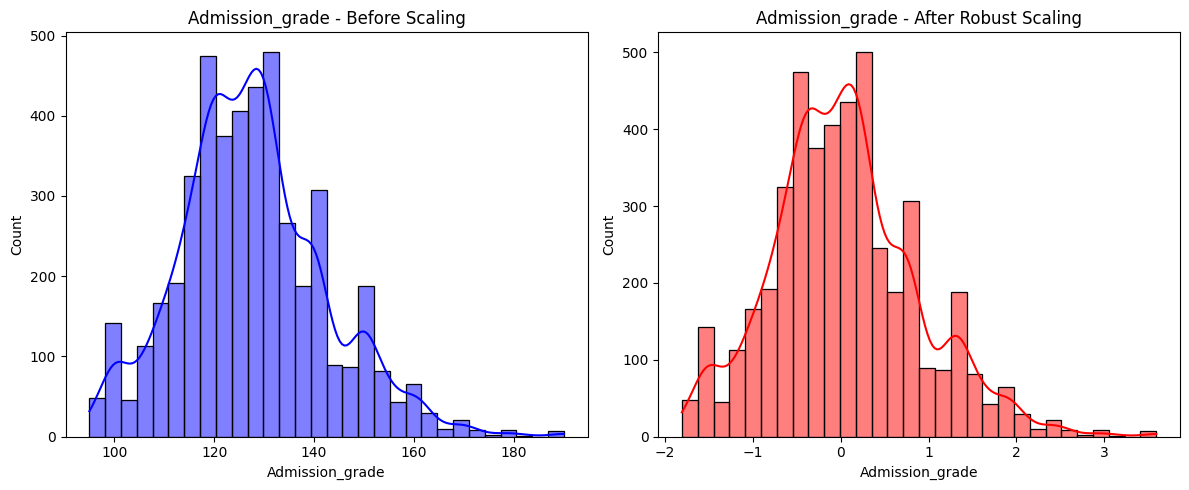

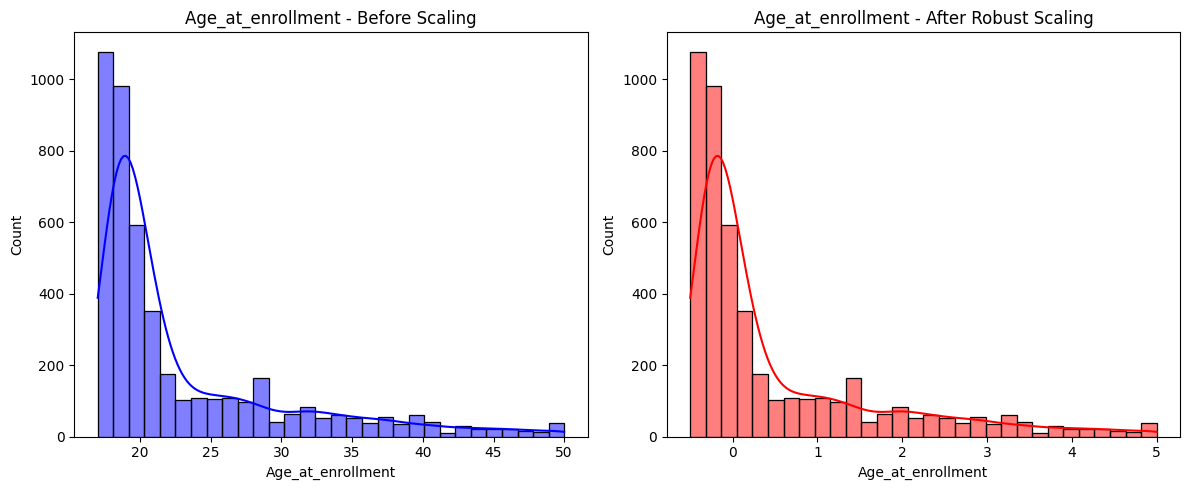

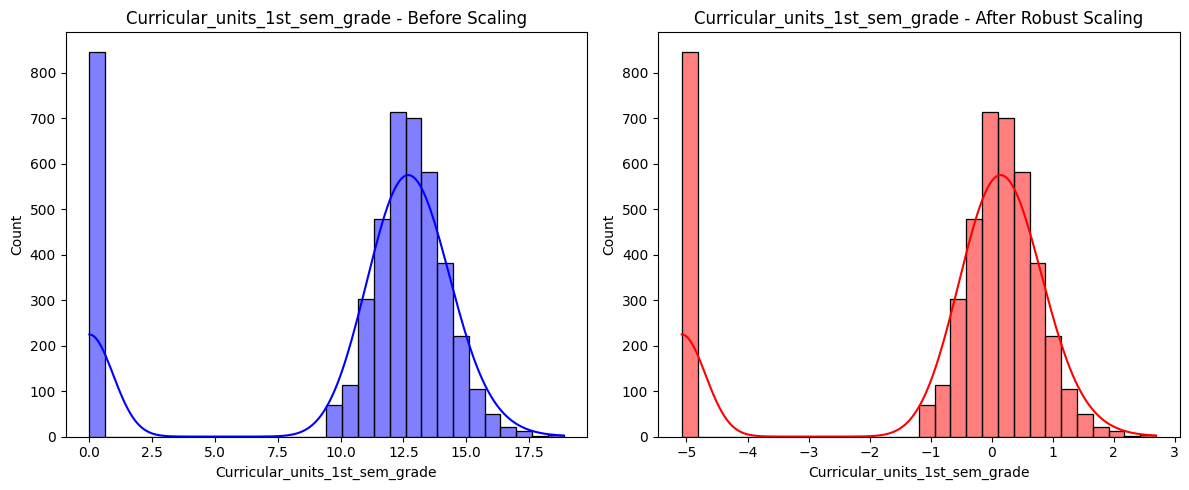

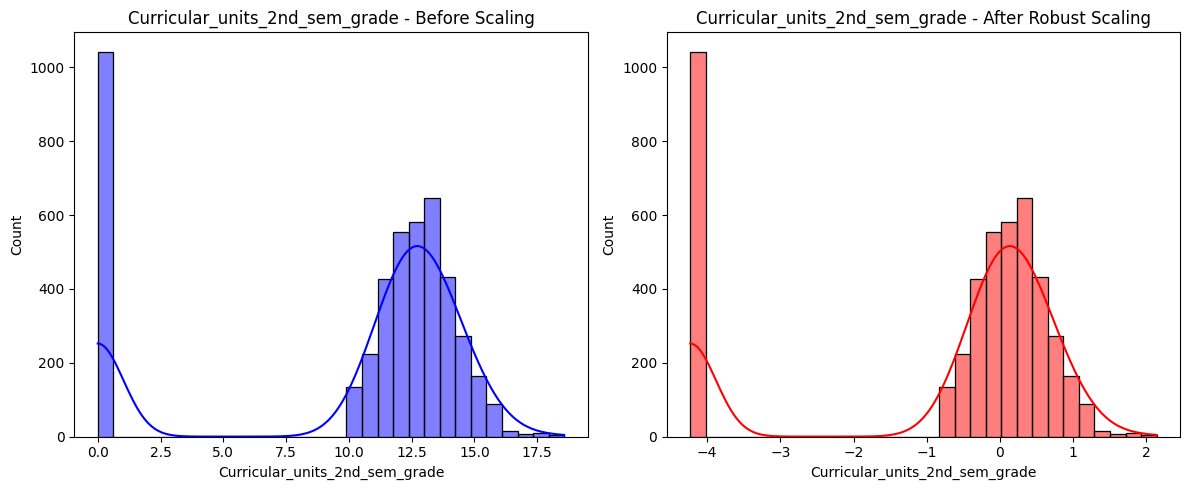

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# --- Robust Scaling ---
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(df[continuous_cols])
robust_df = pd.DataFrame(robust_scaled, columns=continuous_cols)

# --- Visualization ---
for col in continuous_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # Before scaling
    ax1.set_title(f'{col} - Before Scaling')
    sns.histplot(df[col], ax=ax1, color='b', kde=True, bins=30)

    # After Robust Scaling
    ax2.set_title(f'{col} - After Robust Scaling')
    sns.histplot(robust_df[col], ax=ax2, color='r', kde=True, bins=30)

    plt.tight_layout()
    plt.show()


In [ ]:
# Separate features (X) and target (y)
X = df.drop("Target", axis=1)   # all columns except Target
y = df["Target"]                # the target column

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test data
    random_state=42,     # ensures reproducibility
    stratify=y           # keeps class proportions (important for dropout classes)
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3682, 29)
Testing set shape: (921, 29)


In [ ]:
X = df.drop("Target", axis=1)   # features
y = df["Target"]                # label
print(X.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Course                                            int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                            int64
Scholarship_holder                                int64
Age_at_enrollment                                 int64
International                                     int64
Curricular_units_1st_sem_credited               

In [ ]:
# Define numerical columns to scale
columns_to_scale = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade'
]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on training data and transform both training and test
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Create summary DataFrames for better display
train_summary = pd.DataFrame({
    'Mean': X_train_scaled[columns_to_scale].mean().round(3),
    'Std': X_train_scaled[columns_to_scale].std().round(3)
})

test_summary = pd.DataFrame({
    'Mean': X_test_scaled[columns_to_scale].mean().round(3),
    'Std': X_test_scaled[columns_to_scale].std().round(3)
})

print("Training set scaled columns:")
display(train_summary)

print("\nTest set scaled columns:")
display(test_summary)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set scaled columns:


,Mean,Std
Previous_qualification_grade,0.0,1.0
Admission_grade,0.0,1.0
Age_at_enrollment,-0.0,1.0
Curricular_units_1st_sem_grade,-0.0,1.0
Curricular_units_2nd_sem_grade,0.0,1.0



Test set scaled columns:


,Mean,Std
Previous_qualification_grade,0.043,0.947
Admission_grade,-0.019,0.962
Age_at_enrollment,-0.017,0.987
Curricular_units_1st_sem_grade,0.014,0.979
Curricular_units_2nd_sem_grade,-0.005,1.010


Training set shape: (3682, 29)
Test set shape: (921, 29)


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Example: Admission Grade
outliers_grade = detect_outliers_iqr(df, "Admission_grade")
print("Outliers in Admission Grade:", len(outliers_grade))
print(outliers_grade[["Admission_grade", "Target"]].head())

# Example: Age at Enrollment
outliers_age = detect_outliers_iqr(df, "Age_at_enrollment")
print("Outliers in Age at Enrollment:", len(outliers_age))
print(outliers_age[["Age_at_enrollment", "Target"]].head())


Outliers in Admission Grade: 72
     Admission_grade  Target
15             163.4       1
198            170.0       0
210            170.0       1
211            183.5       0
344            170.0       0
Outliers in Age at Enrollment: 446
    Age_at_enrollment  Target
11                 37       0
14                 36       0
24                 37       1
73                 38       0
76                 40       0


In [ ]:
# After all cleaning, encoding, and outlier handling
df_cleaned = df.copy()
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


## Step 4: Modelling

#### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

# Train the model on the training set
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Display first 10 predictions for inspection
print("\n0: Dropout \n1: Graduate")
pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred_logreg[:10]
})


0: Dropout 
1: Graduate


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


Logistic Regression Performance:
Accuracy : 0.906
Precision: 0.897
Recall   : 0.956
F1-score : 0.925



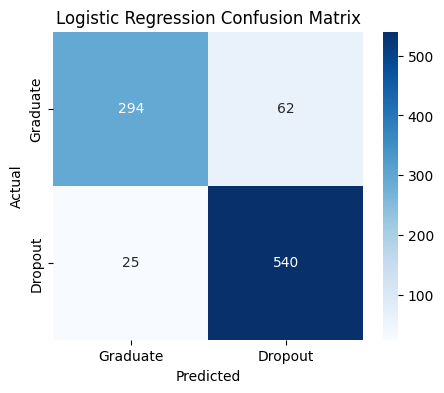

In [ ]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)  #1-Dropout
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)  # numeric labels
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Graduate', 'Dropout'],
            yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Observation:
- 294 students were correctly predicted to Graduate
- 62 students were wrongly predicted to Dropout
- 540 students were correctly predicted to Dropout
- 25 students were wrongly predicted to Graduate

Overall, the accuracy is 90.6%, and the F1-score is 0.925, indicating a balanced performance between precision and recall.

In [ ]:
print(classification_report(y_test, y_pred_logreg, target_names=['Graduate', 'Dropout']))

              precision    recall  f1-score   support

    Graduate       0.92      0.83      0.87       356
     Dropout       0.90      0.96      0.93       565

    accuracy                           0.91       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.91      0.91      0.90       921



- The model has an accuracy of 91% on unseen test data.
- For Graduates (class 1), the model predicts them with 92% precision and 83% recall.
- For Dropouts (class 0), the model predicts them with 90% precision and 96% recall.
- The overall balance of precision and recall is reflected by an F1-score of 0.90, indicating strong predictive performance.

#### Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_tree = dtree.predict(X_test_scaled)

# Display first 10 predictions
print("\nDecision Tree Predictions (first 10):")
print("0: Dropout \n1: Graduate")
pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred_tree[:10]
})


Decision Tree Predictions (first 10):
0: Dropout 
1: Graduate


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0



Decision Tree Performance:
Accuracy : 0.948
Precision: 0.959
Recall   : 0.956
F1-score : 0.957


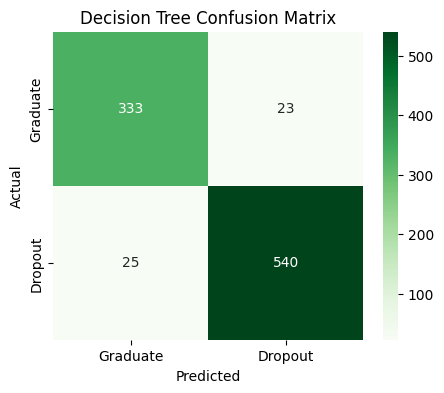

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("\nDecision Tree Performance:")
print(f"Accuracy : {accuracy_tree:.3f}")
print(f"Precision: {precision_tree:.3f}")
print(f"Recall   : {recall_tree:.3f}")
print(f"F1-score : {f1_tree:.3f}")

# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Graduate', 'Dropout'],
            yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Observation:
- 333 students were correctly predicted to Graduate
- 23 students were wrongly predicted to Dropout
- 540 students were correctly predicted to Dropout
- 25 students were wrongly predicted to Graduate

Overall, the accuracy is 94.8%, and the F1-score is 0.957, indicating a strong and balanced performance between precision and recall.

In [ ]:
print(classification_report(y_test, y_pred_tree, target_names=['Graduate', 'Dropout']))

              precision    recall  f1-score   support

    Graduate       0.93      0.94      0.93       356
     Dropout       0.96      0.96      0.96       565

    accuracy                           0.95       921
   macro avg       0.94      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



In [ ]:
# Collect metrics into a DataFrame for easier comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy, accuracy_tree],
    "Precision": [precision, precision_tree],
    "Recall": [recall, recall_tree],
    "f1 Score": [f1, f1_tree]
})

print(results)


                 Model  Accuracy  Precision    Recall  f1 Score
0  Logistic Regression  0.905537   0.897010  0.955752  0.925450
1        Decision Tree  0.947883   0.959147  0.955752  0.957447


Feature: Marital_status, Score: 0.00081
Feature: Application_mode, Score: 0.01495
Feature: Course, Score: 0.02292
Feature: Previous_qualification, Score: 0.00251
Feature: Previous_qualification_grade, Score: 0.04718
Feature: Mothers_qualification, Score: 0.01702
Feature: Fathers_qualification, Score: 0.00800
Feature: Mothers_occupation, Score: 0.00686
Feature: Fathers_occupation, Score: 0.01813
Feature: Admission_grade, Score: 0.02610
Feature: Displaced, Score: 0.00140
Feature: Debtor, Score: 0.00653
Feature: Tuition_fees_up_to_date, Score: 0.05382
Feature: Gender, Score: 0.00145
Feature: Scholarship_holder, Score: 0.01408
Feature: Age_at_enrollment, Score: 0.00956
Feature: International, Score: 0.00148
Feature: Curricular_units_1st_sem_credited, Score: 0.00751
Feature: Curricular_units_1st_sem_enrolled, Score: 0.03717
Feature: Curricular_units_1st_sem_evaluations, Score: 0.01219
Feature: Curricular_units_1st_sem_approved, Score: 0.02101
Feature: Curricular_units_1st_sem_grade, Score: 

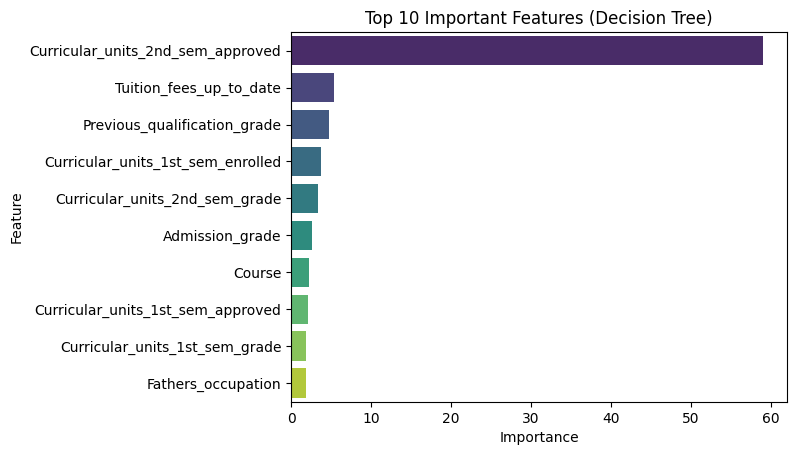

                                 Feature  Importance  Cumulative
26     Curricular_units_2nd_sem_approved   59.078060   59.078060
12               Tuition_fees_up_to_date    5.382295   64.460354
4           Previous_qualification_grade    4.717576   69.177930
18     Curricular_units_1st_sem_enrolled    3.717234   72.895164
27        Curricular_units_2nd_sem_grade    3.342163   76.237327
9                        Admission_grade    2.610342   78.847668
2                                 Course    2.292317   81.139986
20     Curricular_units_1st_sem_approved    2.101138   83.241124
21        Curricular_units_1st_sem_grade    1.869141   85.110265
8                     Fathers_occupation    1.812963   86.923228
5                  Mothers_qualification    1.702292   88.625520
1                       Application_mode    1.495096   90.120616
14                    Scholarship_holder    1.408043   91.528658
19  Curricular_units_1st_sem_evaluations    1.218561   92.747219
25  Curricular_units_2nd_

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on your dataset
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X, y)

# Get feature importances
importance = dtree.feature_importances_

# Summarize feature importance like your first example
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')

# Create DataFrame with percentages
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance * 100
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

# Plot top 10 features
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10), palette="viridis")
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()

# Add cumulative importance
feature_importances["Cumulative"] = feature_importances["Importance"].cumsum()
print(feature_importances.head(15))


## Step 5: Evaluation

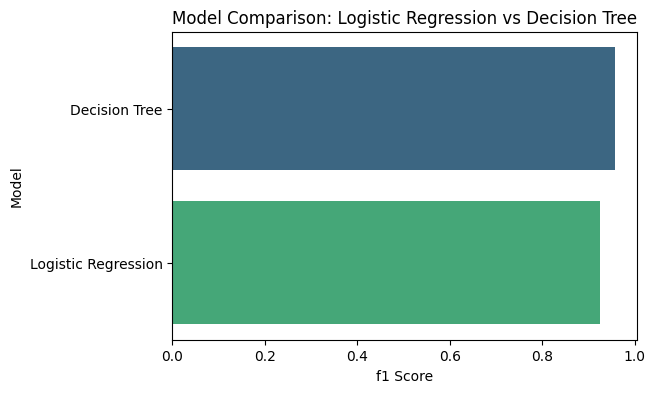

Model Comparison Results:


,Model,Accuracy,Precision,Recall,f1 Score
1,Decision Tree,0.947883,0.959147,0.955752,0.957447
0,Logistic Regression,0.905537,0.897010,0.955752,0.925450



Best Model: Decision Tree with f1-score = 0.957


In [ ]:
# --- Collect results into DataFrame (only models you already evaluated) ---
results_df = pd.DataFrame(results).sort_values(by="f1 Score", ascending=False)

# --- Visualize comparison (only existing models) ---
plt.figure(figsize=(6, 4))
sns.barplot(x="f1 Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison: Logistic Regression vs Decision Tree")
plt.show()

# --- Display best model ---
print("Model Comparison Results:")
display(results_df)

best_model = results_df.iloc[0]  # top model
print(f"\nBest Model: {best_model['Model']} with f1-score = {best_model['f1 Score']:.3f}")


In [ ]:
# --- Save Original Dataset ---
df_original.to_csv("original_dataset.csv", index=False)

df.to_csv("asg3_group5.csv", index=False)

print("✅ Cleansed & normalized dataset saved as 'asg3_group5.csv'")
# --- Save Train/Test Splits ---
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


✅ Cleansed & normalized dataset saved as 'asg3_group5.csv'
